## KMeans code from scratch

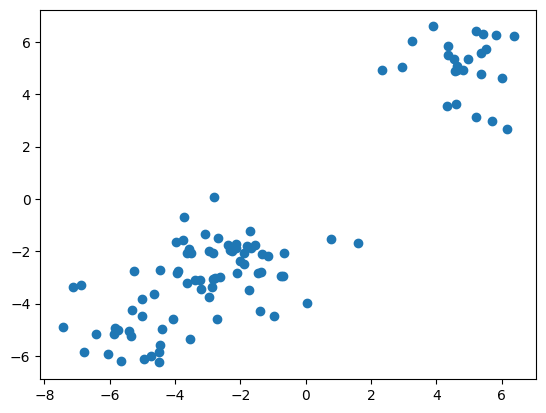

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# centroids = [(-5,-5),(5,5),(-2.5,-2.5)]
centroids = [(-5,-5),(5,5),(-2.5,-2.5),(-2.5,-2.5)]
cluster_std = [1,1,1,1]

x,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(x[:,0],x[:,1])
plt.show()

In [31]:
# # algorithm of KMeans
# 1. Decide clusters
# 2. Select random centroids
# 3. Assign clusters
# 4. Move centroids
# 5. Check finish

In [32]:
import random

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,x):
        random_index = random.sample(range(0,x.shape[0]),self.n_clusters)
        self.centroids = x[random_index]

        for i in range(self.max_iter):
            # assign cluster
            cluster_group = self.assign_clusters(x)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(x,cluster_group)
            # check finish
            if(old_centroids == self.centroids).all():
                break

        return cluster_group
    
    def assign_clusters(self,x):
        cluster_group = []
        distances = []

        for row in x:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)

    def move_centroids(self,x,cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(x[cluster_group==type].mean(axis=0))

        return np.array(new_centroids)

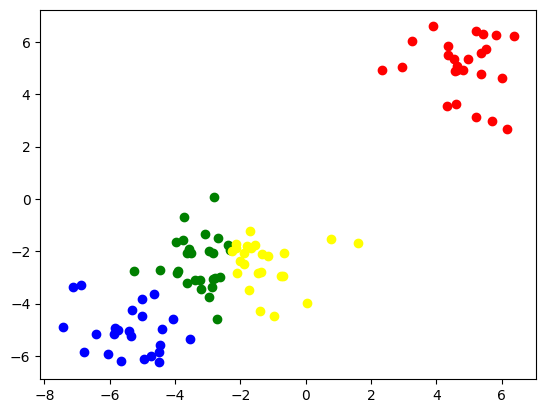

In [33]:
km = KMeans(n_clusters=4, max_iter=100)
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],color='red')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='blue')
plt.scatter(x[y_means==2,0],x[y_means==2,1],color='green')
plt.scatter(x[y_means==3,0],x[y_means==3,1],color='yellow')
plt.show()

## Applying this KMeans on actual csv data

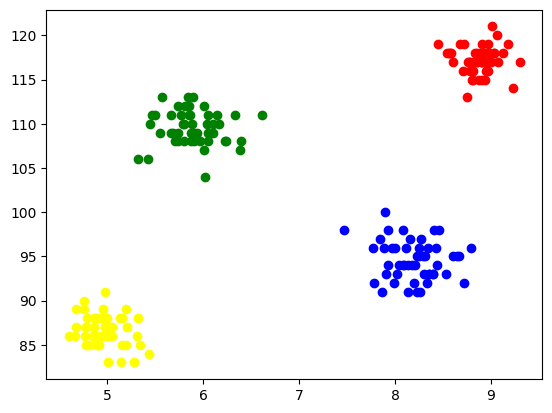

In [37]:
df = pd.read_csv('student_clustering.csv')

x = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=2000)
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],color='red')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='blue')
plt.scatter(x[y_means==2,0],x[y_means==2,1],color='green')
plt.scatter(x[y_means==3,0],x[y_means==3,1],color='yellow')
plt.show()